#TCN Network

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Dense,Flatten,Reshape
from tensorflow.python.keras.layers import Conv1D,MaxPooling1D,Dropout
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
!rm -rf *
!wget https://timeseriesclassification.com/Downloads/ECG5000.zip
!unzip -o ECG5000.zip -d ECG5000/
!cat ECG5000/ECG5000_TRAIN.txt ECG5000/ECG5000_TEST.txt > ECG.txt
!rm -rf ECG5000 ECG5000.zip

--2022-07-26 04:08:30--  https://timeseriesclassification.com/Downloads/ECG5000.zip
Resolving timeseriesclassification.com (timeseriesclassification.com)... 109.123.71.232
Connecting to timeseriesclassification.com (timeseriesclassification.com)|109.123.71.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  11.3MB/s    in 0.9s    

2022-07-26 04:08:32 (11.3 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000/ECG5000.txt     
  inflating: ECG5000/ECG5000_TEST.arff  
  inflating: ECG5000/ECG5000_TEST.txt  
  inflating: ECG5000/ECG5000_TRAIN.arff  
  inflating: ECG5000/ECG5000_TRAIN.txt  
  inflating: ECG5000/ECG5000_TEST.ts  
  inflating: ECG5000/ECG5000_TRAIN.ts  


In [ ]:
df = pd.read_csv("ECG.txt",sep="  ",header=None,engine='python')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit(df.values)
train_data,test_data = train_test_split(df.values,test_size=0.2)
train_data.shape

(4000, 141)

In [ ]:
train_data_scaled = scaled.transform(train_data)
test_data_scaled = scaled.transform(train_data)

In [ ]:
n_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
a_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]
print(n_train_data.shape,a_train_data.shape)

(2346, 140) (1654, 140)


In [ ]:
n_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
a_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]
print(n_test_data.shape,a_test_data.shape)

(2346, 140) (1654, 140)


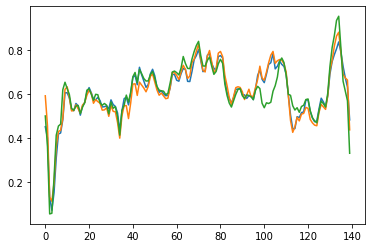

In [ ]:
plt.plot(n_train_data[0])
plt.plot(n_test_data[10])
plt.plot(n_train_data[50])

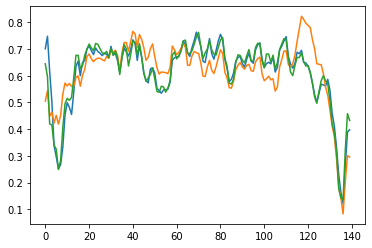

In [ ]:
plt.plot(a_test_data[0])
plt.plot(a_train_data[10])
plt.plot(a_test_data[50])

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
      super(AutoEncoder,self).__init__()
      self.encoder = tf.keras.Sequential([
        Reshape((140,1),input_shape=(140,)),
        Conv1D(128,3,activation = 'relu',input_shape=(140,1)),
        MaxPooling1D(),
        Flatten(),
        Dense(128,activation = 'relu'),
        
        Reshape((128,1),input_shape=(128,)),
        Conv1D(64,3,activation = 'relu',input_shape=(128,1)),
        MaxPooling1D(),
        Flatten(),
        Dense(64,activation = 'relu'),


        Dense(32,activation = 'relu'),
        Dense(16,activation = 'relu')                        
      ])
      self.decoder = tf.keras.Sequential([
        Reshape((16,1),input_shape=(16,)),
        Conv1D(16,3,activation = 'relu',input_shape=(16,1)),
        MaxPooling1D(),
        Flatten(),
        Dense(16,activation = 'relu'),

        Reshape((16,1),input_shape=(16,)),
        Conv1D(32,3,activation = 'relu',input_shape=(16,1)),
        MaxPooling1D(),
        Flatten(),
        Dense(32,activation = 'relu'),

        Dense(64,activation = 'relu'),
        Dense(140,activation = 'sigmoid')  
      ])
  def call(self,x):
      return self.decoder(self.encoder(x))

In [ ]:
model = AutoEncoder()
model.compile(optimizer='adam',loss='mae')
history = model.fit(n_train_data,n_train_data,epochs=50)

Epoch 1/50
74/74 [==============================] - 7s 53ms/step - loss: 0.0804
Epoch 2/50
74/74 [==============================] - 4s 54ms/step - loss: 0.0446
Epoch 3/50
74/74 [==============================] - 4s 59ms/step - loss: 0.0444
Epoch 4/50
74/74 [==============================] - 5s 62ms/step - loss: 0.0440
Epoch 5/50
74/74 [==============================] - 4s 53ms/step - loss: 0.0437
Epoch 6/50
74/74 [==============================] - 4s 55ms/step - loss: 0.0435
Epoch 7/50
74/74 [==============================] - 4s 51ms/step - loss: 0.0436
Epoch 8/50
74/74 [==============================] - 4s 55ms/step - loss: 0.0435
Epoch 9/50
74/74 [==============================] - 4s 49ms/step - loss: 0.0435
Epoch 10/50
74/74 [==============================] - 4s 50ms/step - loss: 0.0433
Epoch 11/50
74/74 [==============================] - 4s 52ms/step - loss: 0.0433
Epoch 12/50
74/74 [==============================] - 4s 49ms/step - loss: 0.0432
Epoch 13/50
74/74 [==================

In [ ]:
reconstructions = model.predict(n_test_data)
train_loss = tf.keras.losses.mae(reconstructions,n_test_data)

In [ ]:
encoder_out = model.encoder(n_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()
print(encoder_out.shape,decoder_out.shape)
n_loss = tf.keras.losses.mae(decoder_out,n_test_data)

(2346, 16) (2346, 140)


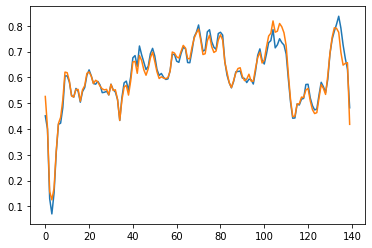

In [ ]:
plt.plot(n_test_data[0])
plt.plot(decoder_out[0])

In [ ]:
encoder_out = model.encoder(a_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()
print(encoder_out.shape,decoder_out.shape)
a_loss = tf.keras.losses.mae(decoder_out,a_test_data)

(1654, 16) (1654, 140)


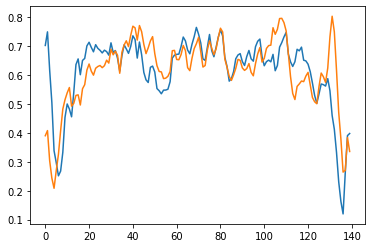

In [ ]:
plt.plot(a_test_data[0])
plt.plot(decoder_out[0])

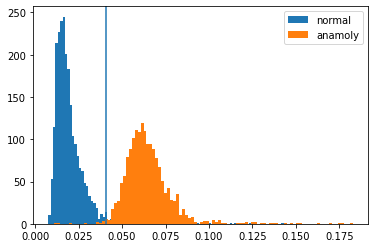

In [ ]:
plt.hist(n_loss,bins=100,label="normal")
plt.hist(a_loss,bins=100,label="anamoly")
threshold = np.mean(train_loss)+2*np.std(train_loss)
plt.axvline(threshold)
plt.legend(loc='upper right')

In [ ]:
data = scaled.transform(df.values) 
normal = data[:,0]==0
anamoly = data[:,0]>0
data = data[:,1:]
q = np.zeros(5000)
q[normal] = 0
q[anamoly] = 1

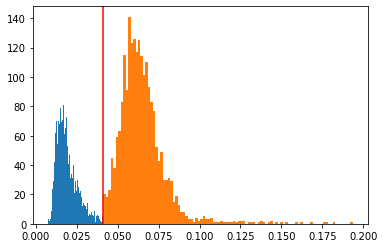

In [ ]:
reconstructions = model.predict(data)
loss = tf.keras.losses.mae(reconstructions,data)
normal =  loss<=threshold
anamoly = loss>threshold
p = np.zeros(5000)
p[normal] = 0
p[anamoly] = 1
plot = plt.hist(loss[normal],bins=100,label="normal")
plot = plt.hist(loss[anamoly],bins=100,label="anamoly")
plt.axvline(threshold,color='r')

In [ ]:
m1 = tf.keras.metrics.Accuracy()
m1.update_state(y_pred = p,y_true = q)
m1.result().numpy()*100

97.61999845504761

In [ ]:
tf.math.confusion_matrix(q,p).numpy()

array([[2817,  102],
       [  17, 2064]], dtype=int32)